### Load Dataset

In [1]:
import os
import tarfile
from six.moves import urllib
import warnings
warnings.filterwarnings("ignore")

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("dataset-housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()

In [6]:
housing = load_housing_data()
print(housing.shape)
housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Simple EDA

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualization

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

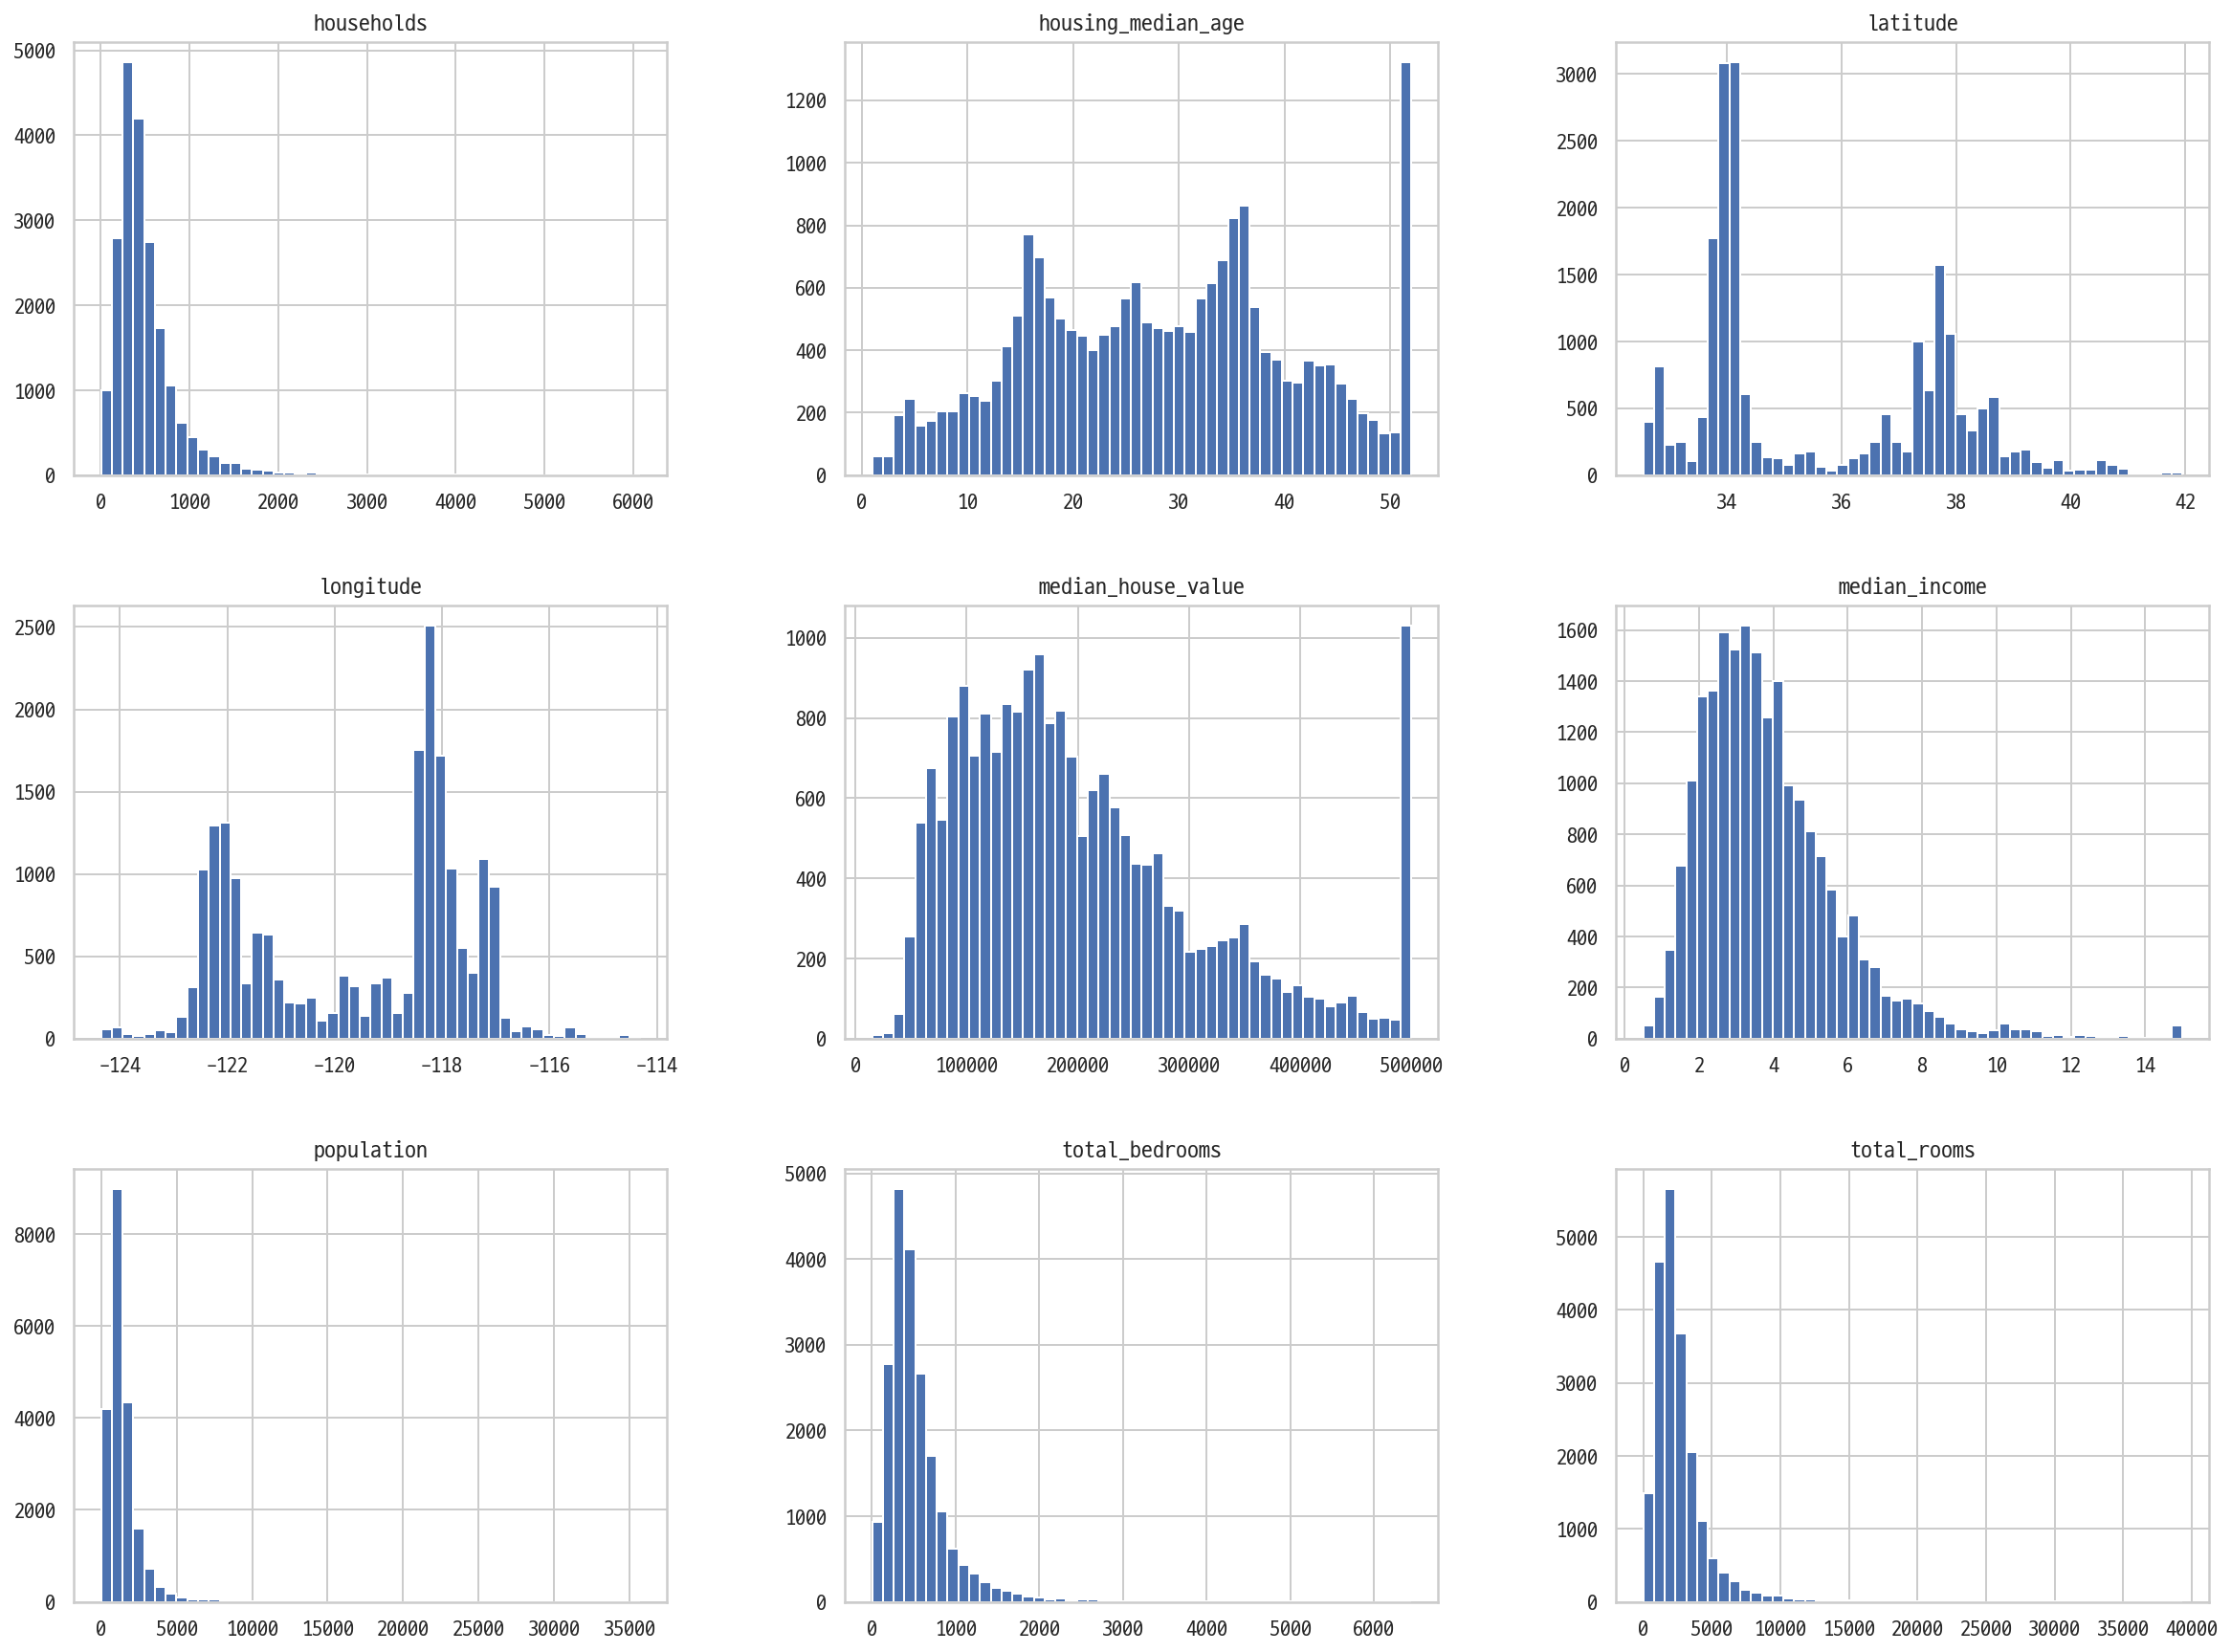

In [11]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Train / Test data Split

In [12]:
import numpy as np

In [13]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.loc[train_indices],  data.iloc[test_indices]

In [14]:
train, test = split_train_test(housing, 0.2)
print(train.shape[0], '+', test.shape[0], '=', train.shape[0] + test.shape[0])

16512 + 4128 = 20640


In [15]:
from zlib import crc32

In [16]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))  &  0xffffffff < test_ratio * 2 ** 32

#### Customized Function

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set =  ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')
print(train.shape[0], '+', test.shape[0], '=', train.shape[0] + test.shape[0])

16512 + 4128 = 20640


#### Use sklearn Function

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(train.shape[0], '+', test.shape[0], '=', train.shape[0] + test.shape[0])

16512 + 4128 = 20640


### Stratified Sampling
- Stratified Sampling (계층적 샘플링)   
특정 카테고리에 대해 모집단의 데이터 분포도가 split 된 후의 데이터셋의 데이터 분포도와 같도록 sampling 하는 방식

In [22]:
housing['income_category'] = np.ceil(housing['median_income'] / 1.5)
housing['income_category'].where(housing['income_category'] < 5, 5.0, inplace=True)
housing[['median_income', 'income_category']].head()

,median_income,income_category
0,8.3252,5.0
1,8.3014,5.0
2,7.2574,5.0
3,5.6431,4.0
4,3.8462,3.0


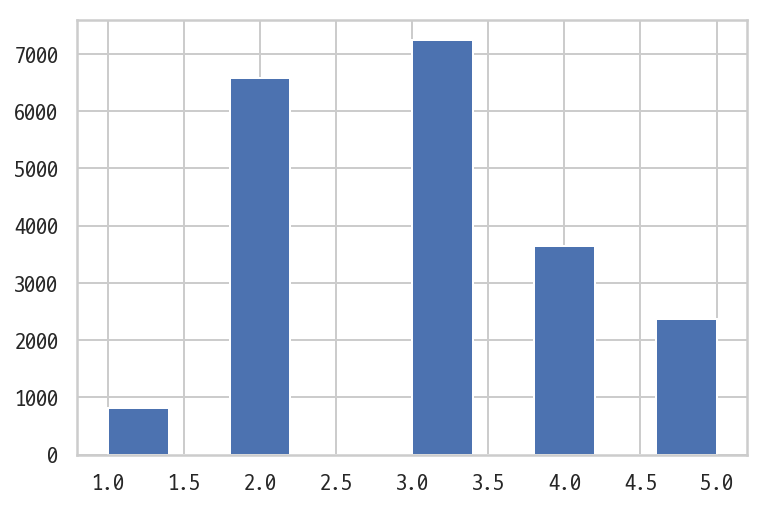

In [23]:
housing['income_category'].hist()
plt.show()

#### Distributions

In [24]:
housing['income_category'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing['income_category']):
    stratified_train_set = housing.loc[train_idx]
    stratified_test_set = housing.loc[test_idx]

In [26]:
stratified_train_set['income_category'].value_counts() / len(stratified_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_category, dtype: float64

In [27]:
stratified_test_set['income_category'].value_counts() / len(stratified_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

- 비율이 모두 비슷한 것을 확인할 수 있다.

In [28]:
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop('income_category', axis=1, inplace=True)

### Deeper Visualizations
- Now we will use `stratified_train_set` instead of original dataset

In [29]:
train = stratified_train_set.copy()

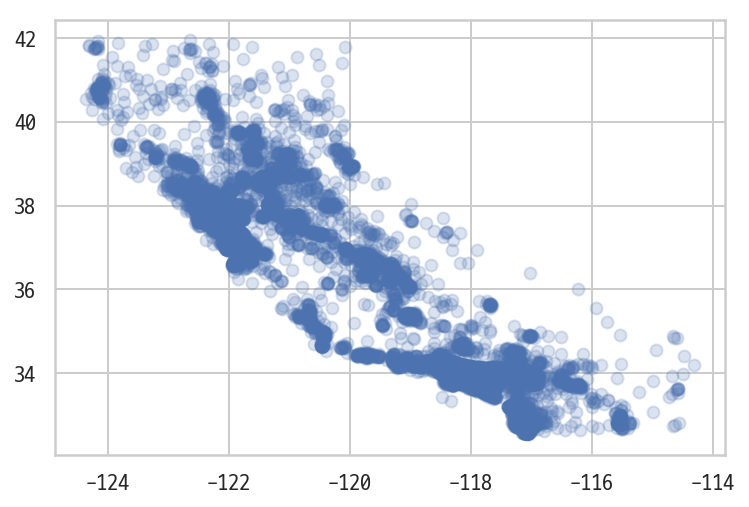

In [30]:
plt.scatter(x=train['longitude'], y=train['latitude'], alpha=0.2)
plt.show()

- `alpha` : 투명도로써 어디에 밀집되어 있는지 확인 가능

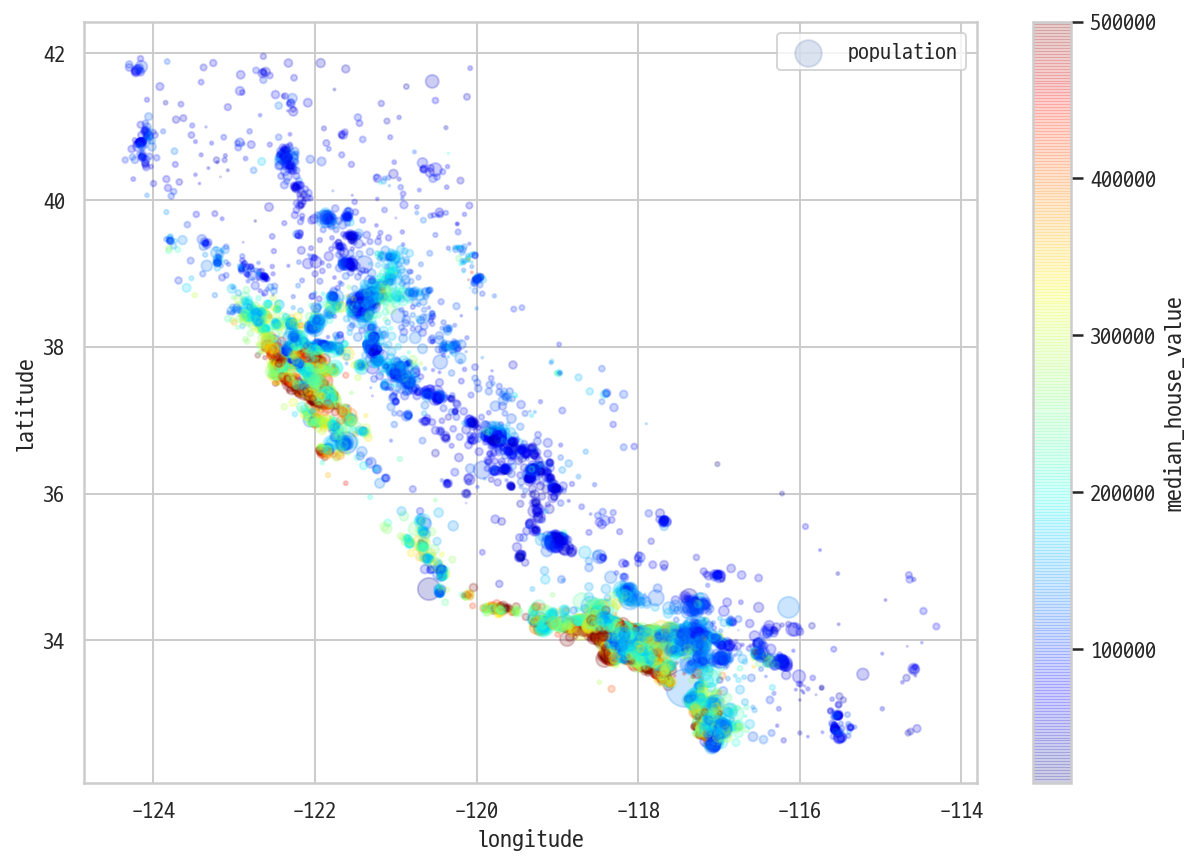

In [31]:
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, \
           s=train['population']/100, label='population', figsize=(10, 7),\
           c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()
plt.show()

- 점의 크기는 `population` 을, 색은 `median_house_value` 를 나타낸다.



- 바다와 인접한 남서쪽일수록 (빨간색) , 그리고 인구 밀도가 클수록 (투명도가 짙은 곳) 집의 가격이 더 비싼 것을 확인할 수 있다.

### Correlation Coefficient

In [32]:
corr = train.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### Correlation Visualize

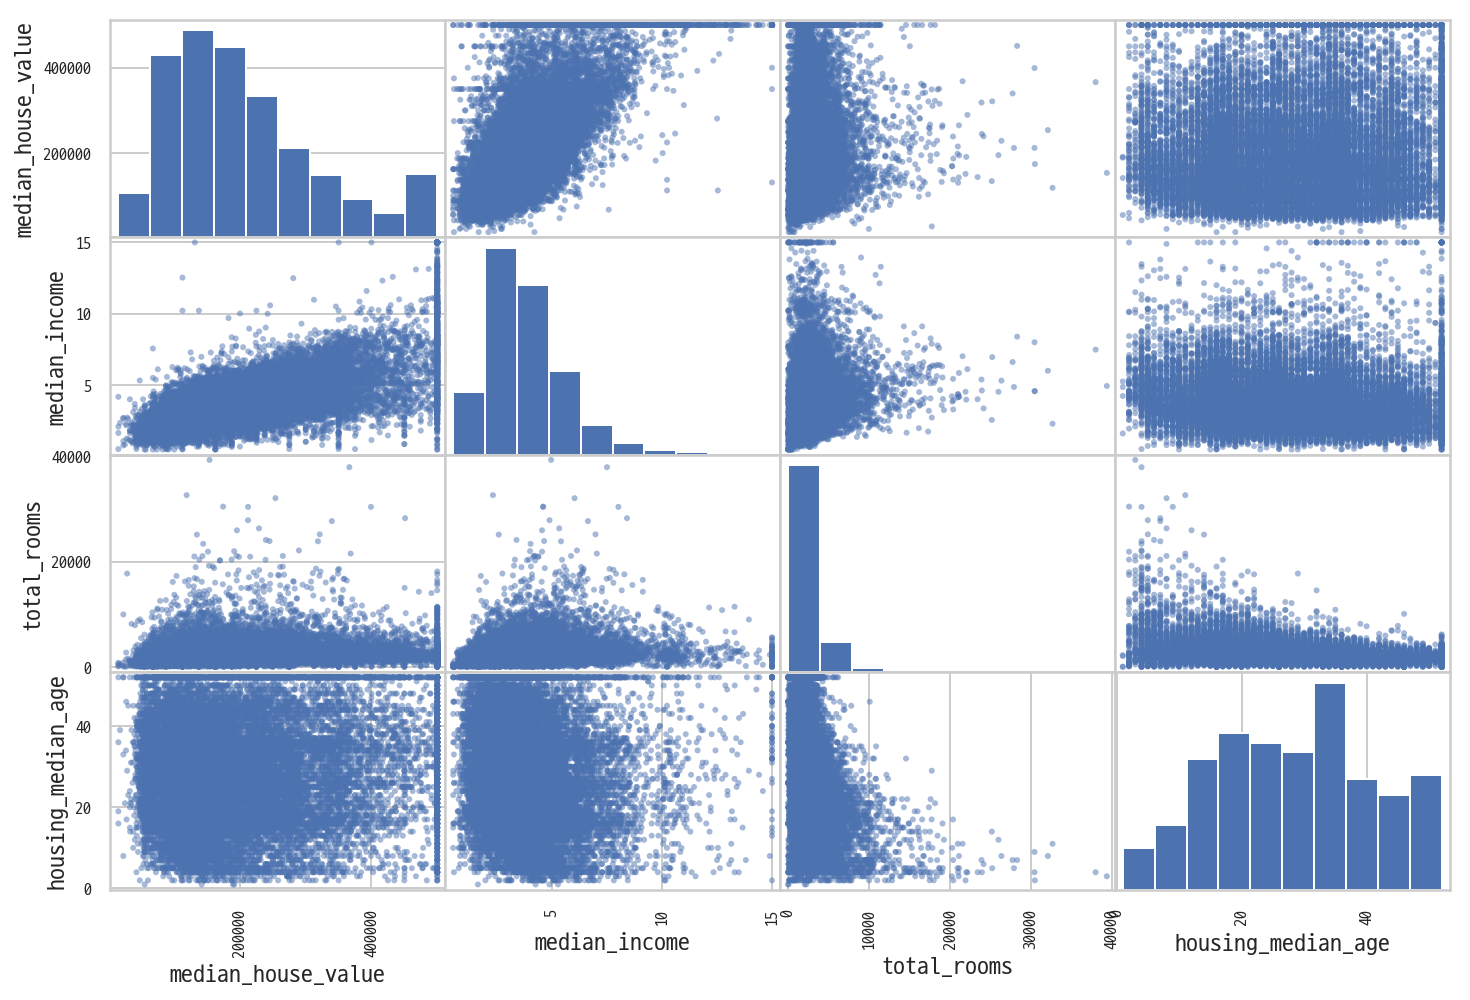

In [33]:
from pandas.plotting import scatter_matrix

features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[features], figsize=(12, 8))
plt.show()

- `median_income` 가 가장 유의미함

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


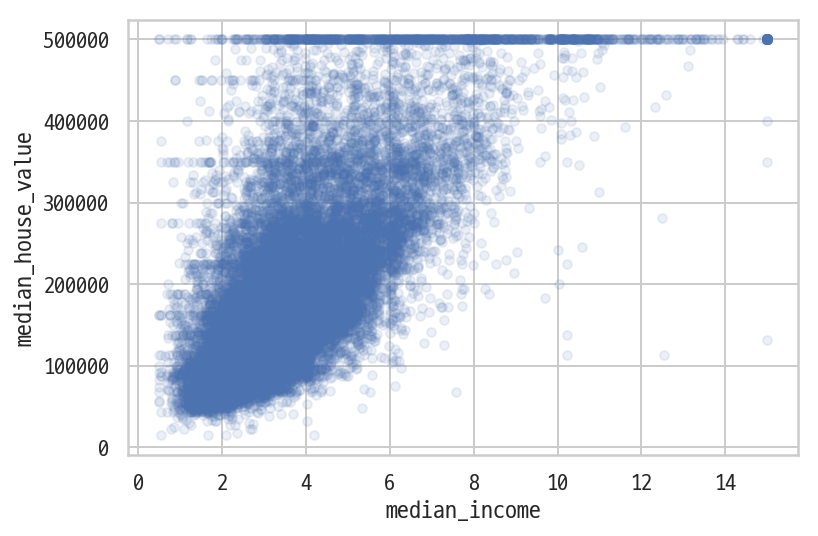

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

- 상관관계가 매우 강하다   


- 가격의 제한값인 \$500,000 이 명확하게 확인됨     


- 그 외에도 350,000 부근과 280,000 부근에 연한 선이 보임 : 제거하는 게 좋음

### Feature Engineering

- `total_rooms` : 특정 구역의 전체 방 개수
    
    
- `households` : 특정 구역의 가구 수

    
- `rooms_per_housholds` : 한 가구 당 방 개수 (`total_rooms` / `households`)

In [35]:
train['rooms_per_households'] = train['total_rooms'] / train['households']

- `total_bedrooms` : 특정 구역의 전체 침실 수
    
    
- `total_rooms` : 특정 구역의 전체 방 개수
    
    
- `bedrooms_per_room` : 전체 방에 대한 침실의 비율

In [36]:
train['bedrooms_per_room'] = train['total_bedrooms'] / train['total_rooms'] 

- `population` : 인구 수

    
- `households` : 가구 수
    
    
- `population_per_households` : 한 가구 당 인원 수

In [37]:
train['population_per_households'] = train['population'] / train['households']

#### correlation 다시 확인

In [38]:
corr = train.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_households         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_room           -0.259984
Name: median_house_value, dtype: float64

- `rooms_per_households` , 즉 한 집에 방이 몇 개나 있는지가 강한 양의 상관관계 : 방이 많을수록 비싸다

    
- `bedrooms_per_room` , 즉 전체 방에 대해 침실의 비율은 음의 상관관계 : 침실이 아닌 방이 많을수록 비싸다

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

#### X, y 데이터로 분리

In [39]:
train_X = stratified_train_set.drop('median_house_value', axis=1)
train_y = stratified_train_set['median_house_value'].copy()

#### 누락값 중간값으로 채우기

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

- sklearn의 Imputer는 숫자 데이터에만 적용되므로 category 데이터는 잠시 빼두기

In [41]:
train_X_num = train_X.drop('ocean_proximity', axis=1)

In [42]:
imputer.fit(train_X_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

- `statistics_` 속성에 median값이 저장되어 있음

In [43]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [44]:
train_X_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [45]:
train_X_num = pd.DataFrame(imputer.transform(train_X_num), columns=train_X_num.columns, \
                           index=list(train_X.index.values))
print(train_X_num.shape)
train_X_num.head()

(16512, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


#### 범주형 데이터인 `ocean_proximity` 변환하기

In [46]:
train_X_cat = train_X['ocean_proximity']
train_X_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [47]:
train_X_cat.value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

- 카테고리는 총 5가지 : one hot encoding을 하기로

In [48]:
train_X_cat_get_dummies = pd.get_dummies(train_X_cat)
train_X_cat_get_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0


In [49]:
train_X_cat_get_dummies.columns

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

#### Categorical Encoder로 변환

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', sparse=False)

train_X_cat_reshaped = train_X_cat.values.reshape(-1, 1)

train_X_cat_1hot = encoder.fit_transform(train_X_cat_reshaped)
train_X_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [51]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Extra Feature Adding

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

In [54]:
rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx] / X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, household_idx]
            return np.c_[X, rooms_per_household, population_per_household, \
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [55]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
extra_columns = list(train_X.columns)
extra_columns.extend(['rooms_per_household', 'population_per_household'])
train_X_extra_attribs = pd.DataFrame(attr_adder.transform(train_X.values), columns=extra_columns)
print(train_X_extra_attribs.shape)
train_X_extra_attribs.head()

(16512, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### DataFrameSelector : num / category columns 분리

In [56]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

### Feature Engineering Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attributes = list(train_X_num)
cat_attributes = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [58]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [59]:
train_X_prepared = full_pipeline.fit_transform(train_X)
print(train_X_prepared.shape)
train_X_prepared

(16512, 16)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
from sklearn.metrics import mean_squared_error

prediction = lin_reg.predict(train_X_prepared)
linear_rmse = np.sqrt(mean_squared_error(train_y, prediction))
linear_rmse

68911.49637588045

### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
prediction = tree_reg.predict(train_X_prepared)
tree_rmse = np.sqrt(mean_squared_error(train_y, prediction))
tree_rmse

0.0

- 오차가 0이다? : 과대적합

In [64]:
prediction

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

In [65]:
train_y.values

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

- 완전히 똑같은 것 확인

## Cross Validation

In [66]:
def display_scores(scores):
    print('Scores:', [int(i) for i in scores])
    print('Mean:', scores.mean())
    print('Standard deviaition:', scores.std())

#### Decision Tree

In [67]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, train_X_prepared, train_y, \
                              scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [68]:
display_scores(tree_rmse_scores)

Scores: [70113, 67323, 71825, 72537, 69910, 75142, 73536, 70079, 77791, 68900]
Mean: 71716.1477913092
Standard deviaition: 2972.764485163272


#### Linear Regression

In [69]:
lin_scores = cross_val_score(lin_reg, train_X_prepared, train_y, \
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67474, 67233, 69301, 74716, 68426, 71609, 65200, 68687, 72262, 68111]
Mean: 69302.41894389638
Standard deviaition: 2653.460699447043


### Ensemble model : random forest

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(train_X_prepared, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
forest_scores = cross_val_score(forest_reg, train_X_prepared, train_y, \
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [72]:
display_scores(forest_rmse_scores)

Scores: [52144, 48722, 52294, 54628, 52864, 57334, 52282, 51064, 55903, 52360]
Mean: 52960.071109787816
Standard deviaition: 2325.2663239881235


## Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, \
                           scoring='neg_mean_squared_error', return_train_score=True, \
                           verbose=1, n_jobs=4)
grid_search.fit(train_X_prepared, train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   10.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

- `n_jobs=4` : 10초
- `n_jobs=1` : 33초

In [74]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [75]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63709.62084474364 {'max_features': 2, 'n_estimators': 3}
56353.097521385585 {'max_features': 2, 'n_estimators': 10}
53034.535861146636 {'max_features': 2, 'n_estimators': 30}
60089.85804069297 {'max_features': 4, 'n_estimators': 3}
52637.1748087518 {'max_features': 4, 'n_estimators': 10}
50490.407977943134 {'max_features': 4, 'n_estimators': 30}
59107.276470826546 {'max_features': 6, 'n_estimators': 3}
51967.5481602476 {'max_features': 6, 'n_estimators': 10}
49909.854541607114 {'max_features': 6, 'n_estimators': 30}
59259.01104322037 {'max_features': 8, 'n_estimators': 3}
52053.505232187395 {'max_features': 8, 'n_estimators': 10}
49715.23928643527 {'max_features': 8, 'n_estimators': 30}
63527.360319837964 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54665.607969013625 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60538.86014242682 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52369.43024137705 {'bootstrap': False, 'max_features': 3, 'n_estimator

### Random Search

- 탐색 공간이 커지면 GridSearch보다 RandomSearch 가 더 좋을 수 있음

### Feature Importances

In [77]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_attribs = list(train_X_cat_get_dummies.columns)
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3605881103155761, 'median_income'),
 (0.17646887201638192, 'INLAND'),
 (0.11010024610580896, 'pop_per_hhold'),
 (0.07680525821899489, 'latitude'),
 (0.07593851689955973, 'longitude'),
 (0.06807140886958184, 'rooms_per_hhold'),
 (0.04125399811085783, 'housing_median_age'),
 (0.02480900206933779, 'bedrooms_per_room'),
 (0.016885263831984063, 'total_rooms'),
 (0.014548789005960695, 'population'),
 (0.013861000961163892, 'total_bedrooms'),
 (0.013634763704013978, 'households'),
 (0.002962204458589884, 'NEAR OCEAN'),
 (0.0022714767575802678, '<1H OCEAN'),
 (0.0017376548236706598, 'NEAR BAY'),
 (6.343385093762067e-05, 'ISLAND')]

## Final Model

In [78]:
final_model = grid_search.best_estimator_

X_test = stratified_test_set.drop('median_house_value', axis=1)
y_test = stratified_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

47729.65259842138